## Lesson-01 Assignment

#### 今天是2020年08月16日，今天世界上又多了一名AI工程师 :) 

## 本次作业的内容

1. 复现课堂代码

在本部分，你需要参照我们给大家的GitHub地址里边的课堂代码，结合课堂内容，复现内容。

1.1 基于规则的语言模型

（1）初始语言规则

In [1]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*                  
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [2]:
import random

In [3]:
def adj():  return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]

In [9]:
def adj_star():
    return random.choice([lambda : '', lambda : adj() + adj_star()])()

In [12]:
adj_star()

'好看的'

问题：语法的局限性，即如果我们更换了语法，会发现所有相关的程序，都要重新写。

措施：根据语法描述，生成通用的语法规则

In [13]:
# （1.1） adj语法描述
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [14]:
# （1.2）根据语法描述 grammar_str 生成规则 grammar
def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [15]:
# （1.3）根据语法描述 adj_grammar 生成语法规则 grammar
grammar = create_grammar(adj_grammar)

In [16]:
# adj_grammar的语法规则
grammar

{'Adj*': [['null'], ['Adj', 'Adj*']], 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [17]:
grammar['Adj*']

[['null'], ['Adj', 'Adj*']]

In [18]:
grammar['Adj']

[['蓝色的'], ['好看的'], ['小小的']]

根据语法规则生成句子

In [21]:
# （2.1）句子语法描述
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*                  
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [22]:
# （2.2）根据语句子法描述生成句子语法规则
example_grammar = create_grammar(simple_grammar)

In [23]:
# （2.3）生成的句子语法规则
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [24]:
# （3.1）根据（句子）语法规则生成句子
choice = random.choice

def generate(gram, target):
    if target not in gram: return target # means target is a terminal expression #1
    
    expaned = [generate(gram, t) for t in choice(gram[target])]  #2
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null']) #3

In [28]:
# （3.2）根据（句子）语法规则生成句子
generate(gram=example_grammar, target='sentence')

'一个好看的小小的篮球坐在一个篮球'

In [29]:
# 例子1

#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""
for i in range(20):
    print(generate(gram=create_grammar(host, split='='), target='host'))
    print(generate(gram=create_grammar(human, split='='), target='human'))

您好我是17187号,您需要喝酒吗？
我找找玩的
先生,您好我是1号,您需要喝酒吗？
俺找找玩的
你好我是12号,您需要打猎吗？
俺想找点玩的
您好我是3号,请问你要赌博吗？
我找找乐子
小朋友,您好我是8号,请问你要赌博吗？
我们想找点玩的
你好我是58号,您需要打牌吗？
我想找点乐子
女士,您好我是3号,您需要赌博吗？
我想找点乐子
女士,您好我是25号,请问你要打牌吗？
我们找找乐子
先生,您好我是58848号,您需要打牌吗？
我找找玩的
小朋友,您好我是1781号,请问你要打牌吗？
俺找找乐子
女士,您好我是8763号,请问你要喝酒吗？
我们想找点乐子
您好我是8号,请问你要赌博吗？
我们想找点乐子
先生,你好我是94号,请问你要赌博吗？
我们想找点玩的
女士,您好我是68号,您需要打牌吗？
我们想找点玩的
你好我是33号,您需要打猎吗？
俺找找玩的
小朋友,你好我是1号,请问你要喝酒吗？
我们想找点乐子
先生,你好我是5号,您需要喝酒吗？
俺找找乐子
你好我是14号,您需要打牌吗？
我找找玩的
小朋友,你好我是4号,您需要赌博吗？
我想找点玩的
先生,你好我是4号,请问你要赌博吗？
俺找找乐子


输入的语法描述改变，程序不变

In [32]:
# 例子3：
simpel_programming = '''
programming => if_stmt | assign | while_loop
while_loop => while ( cond ) { change_line stmt change_line }
if_stmt => if ( cond )  { change_line stmt change_line } | if ( cond )  { change_line stmt change_line } else { change_line stmt change_line } 
change_line => /N
cond => var op var
op => | == | < | >= | <= 
stmt => assign | if_stmt
assign => var = var
var =>  var _ num | words 
words => words _ word | word 
word => name | info |  student | lib | database 
nums => nums num | num
num => 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 0
'''
# 根据语法规则生成一段代码
print(generate(gram=create_grammar(simpel_programming, split='=>'), target='programming'))

while(lib_libdatabase_info_8_5){/Ndatabase_info_lib_info_student_2=name/N}


In [33]:
# 例子4：格式化输出
def pretty_print(line):
    # utility tool function
    lines = line.split('/N')
    
    code_lines = []
    
    for i, sen in enumerate(lines):
        if i < len(lines) / 2: 
            #print()
            code_lines.append(i * "  " + sen)
        else:
            code_lines.append((len(lines) - i) * " " + sen)
    
    return code_lines

In [36]:
generated_programming = []
# 根据语法描述生成20段代码
for i in range(2):
    generated_programming += pretty_print(generate(gram=create_grammar(simpel_programming, split='=>'), target='programming'))

In [37]:
# 打印20段代码
for line in generated_programming:
    print(line)

while(info==info_5_0_2_2_5_5_3_6_1_9_7_2){
  database_database=name_info
 }
if(info_1==info_name_database_info_student){
  database_database=database_0
 }


1.2  Language Model 

$$ language\_model(String) = Probability(String) \in (0, 1) $$

$$ Pro(w_1 w_2 w_3 w_4) = Pr(w_1 | w_2 w_3 w_ 4) * P(w_2 | w_3 w_4) * Pr(w_3 | w_4) * Pr(w_4)$$ 

$$ Pro(w_1 w_2 w_3 w_4) \sim Pr(w_1 | w_2 ) * P(w2 | w_3 ) * Pr(w_3 | w_4) * Pr(w_4)$$ 

how to get $ Pr(w1 | w2 w3 w4) $ ?

In [39]:
import random
import jieba
import pandas as pd
import re
from collections import Counter

In [40]:
from functools import reduce
from operator import add, mul
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

数据预处理

In [41]:
# 读取文件
filename = 'sqlResult_1558435.csv'
content = pd.read_csv(filename, encoding='gb18030')

In [42]:
# 前5行数据
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [43]:
# 提取 content 列
articles = content['content'].tolist()
print(len(articles))

89611


In [44]:
# 正则查找所有字词
def token(string):
    # we will learn the regular expression next course.
    return re.findall('\w+', string)

In [45]:
# 将第110条语句进行分词并计数
with_jieba_cut = Counter(jieba.cut(articles[110]))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Lee\AppData\Local\Temp\jieba.cache
Loading model cost 2.347 seconds.
Prefix dict has been built succesfully.


In [46]:
# 词频最高的10个词
with_jieba_cut.most_common()[:10]

[('，', 88),
 ('的', 73),
 ('。', 39),
 ('\r\n', 27),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('、', 12)]

In [47]:
# 查找第110条记录的所有字词，无空格连接
''.join(token(articles[110]))

'在外国名著麦田里的守望者中作者想要守护麦田里如自己内心一般纯真的孩子们而驻村干部们也在这个炎热的夏天里撸袖子上阵真正做起了村民们的麦田守望者三夏时节不等人你看到了吗不停翻涌起伏仿若铺陈至天边的金黄麦浪中那若隐若现的人影是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者在这个炎热的夏季他们深入田间地头帮助村民们收割小麦扛起收麦机麦田中的每个人都显得兴致勃勃一天下来就近22亩小麦收割完毕志愿者麦麦提亚森擦去满脸的汗水高兴地告诉驻村队员我们青年志愿者应该多做贡献为村里的脱贫致富出把力工作队带着我们为村里的老人服务看到那些像我爷爷奶奶一样的老人赞许感谢的目光我体会到了帮助他人的快乐自治区新闻出版广电局驻村工作队孙敏艾力依布拉音麦收时节我们在一起6月中旬的和田墨玉麦田金黄静待收割6月14日15日两天自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道帮助村里29户有需要的村民进行小麦收割工作田间地头罕勒克艾日克村志愿队的红旗迎风飘扬格外醒目10余台割麦机一起轰鸣男人们在用机器收割小麦的同时几名妇女也加入到志愿队构成了一道美丽的麦收风景休息空闲工作队员和村民们坐在树荫下田埂上互相问好聊天语言交流有困难就用手势动作比划着聊天有趣地交流方式不时引来阵阵欢笑大家在一同享受丰收和喜悦也一同增进着彼此的情感和友谊自治区高级人民法院驻村工作队周春梅艾地艾木阿不拉细看稻菽千重浪6月15日自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村见到了自己的亲戚现场处处都透出掩盖不住的喜悦一声声亲切的谢谢一个个结实的拥抱都透露出浓浓的亲情没坐一会儿在嘘寒问暖中大家了解到在麦收的关键时刻部分村民家中却存在收割难的问题小麦成熟期短收获的时间集中天气的变化对小麦最终产量的影响极大如果不能及时收割会有不小损失的于是大家几乎立刻就决定要帮助亲戚们收割麦子在茂密的麦地里干部们每人手持一把镰刀一字排开挽起衣袖卷起裤腿挥舞着镰刀进行着无声的竞赛骄阳似火汗如雨下但这都挡不住大家的热情随着此起彼伏的镰刀割倒麦子的刷刷声响不一会一束束沉甸甸的麦穗就被整齐地堆放了起来当看到自己亲手收割的金黄色麦穗被一簇簇地打成捆运送到晒场每个人的脸上都露出了灿烂的笑容自治区煤田灭火工程局驻村工作队马浩南这是一个收获多多的季节6月1

In [48]:
# 查找每条记录的所有字词，无空格连接
articles_clean = [''.join(token(str(a)))for a in articles]
print(len(articles_clean))

89611


In [49]:
# 保存到文件
with open('article_9k.txt', 'w') as f:
    for a in articles_clean:
        f.write(a + '\n')

分词

In [50]:
# 定义分词函数
def cut(string): return list(jieba.cut(string))

In [51]:
# 将保存到文件中的前10000行字词进行分词
TOKEN = []

for i, line in enumerate((open('article_9k.txt'))):
    if i % 100 == 0: print(i)
    
    # replace 10000 with a big number when you do your homework. 
    
    if i > 10000: break    
    TOKEN += cut(line)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000


In [53]:
# 对分词进行计数
words_count = Counter(TOKEN)
# 词频最高的前100个词
words_count.most_common(100)

[('的', 184244),
 ('在', 47370),
 ('了', 36722),
 ('和', 30809),
 ('是', 30283),
 ('月', 18711),
 ('也', 15995),
 ('年', 15971),
 ('有', 14714),
 ('为', 14448),
 ('等', 14340),
 ('将', 14060),
 ('对', 13074),
 ('与', 12568),
 ('日', 12322),
 ('中', 11117),
 ('中国', 11036),
 ('6', 10477),
 ('上', 10192),
 ('不', 10027),
 ('\n', 10001),
 ('他', 9530),
 ('都', 9447),
 ('发展', 8795),
 ('企业', 8584),
 ('就', 8537),
 ('到', 8338),
 ('市场', 8095),
 ('但', 7729),
 ('这', 7658),
 ('被', 7575),
 ('从', 7513),
 ('并', 7412),
 ('人', 7339),
 ('后', 7084),
 ('公司', 6915),
 ('一个', 6772),
 ('说', 6703),
 ('新', 6467),
 ('表示', 6309),
 ('要', 6276),
 ('还', 6245),
 ('会', 6179),
 ('个', 6176),
 ('我', 6141),
 ('而', 6090),
 ('进行', 5802),
 ('我们', 5742),
 ('记者', 5734),
 ('以', 5615),
 ('5', 5569),
 ('工作', 5135),
 ('没有', 5000),
 ('美国', 4840),
 ('下', 4741),
 ('更', 4739),
 ('通过', 4720),
 ('大', 4704),
 ('让', 4701),
 ('可以', 4681),
 ('经济', 4670),
 ('时', 4654),
 ('目前', 4645),
 ('国家', 4628),
 ('项目', 4538),
 ('问题', 4422),
 ('创新', 4416),
 ('多', 4410),
 ('已

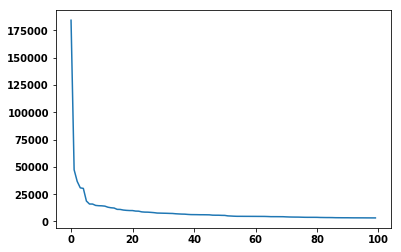

In [54]:
# 高频词绘图

# y坐标：前100个高频词的词频
frequiences = [f for w, f in words_count.most_common(100)]
# x坐标：100个词
x = [i for i in range(100)]
# 绘图
plt.plot(x, frequiences)

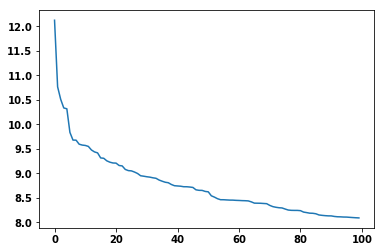

In [55]:
# 半指数绘图
plt.plot(x, np.log(frequiences))

计算概率

In [59]:
# 计算每个词出现的概率
def prob_1(word):
    return words_count[word] / len(TOKEN)

# count(wk)/(number of words)

In [60]:
prob_1('我们')

0.001554473157589251

条件概率：p(w1|w2) = count(w1,w2)/count（w1)

In [64]:
# 列表中元素转为字符串
TOKEN = [str(t) for t in TOKEN]
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [65]:
# 连接相邻的两个词
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [66]:
# 相邻连词计数
words_count_2 = Counter(TOKEN_2_GRAM)

In [78]:
# 计算条件概率
def prob_2(word1, word2):  # p(w1,w2) = count(w1,2)/count(w1)  
    if word1 + word2 in words_count_2: return words_count_2[word1+word2] / words_count[word1]
    else: # 不存在的概率设为非零值
        return 1 / len(TOKEN_2_GRAM)
    
#  (w1 w2), (w3,w4) (w4,w5)  2-gram
# (w1,w3)  1/3

######  此处分母用count(w1)还是count(w2)，对概率结果影响比较大

In [82]:
prob_2('我们', '在')

0.030128874956461164

In [83]:
prob_2('在', '吃饭')

2.1110407430863417e-05

In [84]:
prob_2('去', '吃饭')

2.707199580708929e-07

语言模型

In [85]:
# 基于语言模型，计算一条语句出现的概率
def get_probablity(sentence):
    words = cut(sentence)
    
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probability = prob_2(word, next_)  # p(w1|w2)
        
        sentence_pro *= probability  # p(s) = p(w_1)p(w2|w1)*p(w3|w2)..p(wn|wn-1) 
    
    return sentence_pro

In [86]:
get_probablity('小明今天抽奖抽到一台苹果手机')

6.743762360853308e-35

In [87]:
get_probablity('小明今天抽奖抽到一架波音飞机')

7.989690983840629e-36

In [88]:
get_probablity('洋葱奶昔来一杯')

1.9840875058382383e-20

In [89]:
get_probablity('养乐多绿来一杯')

7.3289295697906e-14

In [90]:
# 根据语法描述生成10个句子，计算出现的概率
for sen in [generate(gram=example_grammar, target='sentence') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))

sentence: 这个好看的女人看着一个女人 with Prb: 3.62337402355287e-28
sentence: 这个桌子看见一个小小的篮球 with Prb: 2.9056262380901015e-25
sentence: 这个蓝色的小小的篮球看见这个好看的小猫 with Prb: 2.233653670683022e-41
sentence: 一个小小的蓝色的桌子听着这个蓝色的女人 with Prb: 3.7849014935357674e-38
sentence: 这个小猫看着一个桌子 with Prb: 2.9298397900741853e-24
sentence: 一个篮球听着一个好看的篮球 with Prb: 5.212286615014935e-29
sentence: 一个小小的女人听着一个蓝色的女人 with Prb: 6.58742342357102e-32
sentence: 一个小猫听着一个好看的桌子 with Prb: 2.3165718288955266e-29
sentence: 一个女人看着一个好看的桌子 with Prb: 4.9977572738660276e-29
sentence: 这个小小的桌子坐在这个小小的好看的蓝色的桌子 with Prb: 8.715542627988036e-51


In [91]:
# 比较两个句子出现的概率大小
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 6.684624207742742e-46
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 7.542849854956504e-46
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 2.1153007661637964e-26
---- 真是一只好看的小猫 with probility 7.813612196297205e-20
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 5.012457937326253e-16
---- 今晚火锅去吃我 with probility 1.563034443630964e-18
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.9840875058382383e-20
---- 养乐多绿来一杯 with probility 7.3289295697906e-14


2. 完成以下问答和编程练习

###  基础理论部分

#### 0. Can you come up out 3 sceneraies which use AI methods? 

Ans: {人脸识别、语音助手、智能对话}

#### 1. How do we use Github; Why do we use Jupyter and Pycharm;

Ans: {
1. Github：远程代码仓库，保存不同代码版本，便于分享和协作；
2. Jupyter：基于服务器-客户端结构的网页应用，局部代码即时运行，交互性效果最好，支持MarkDown注释和绘图展示；
3. Pycharm：Python专用集成开发环境，安装配置简单，功能支持全面。}

#### 2. What's the Probability Model?

Ans:概率模型是描述不同随机变量之间关系的数学模型，通常情况下刻画了一个或多个随机变量之间的相互非确定性的概率关系。
从数学上讲，该模型通常被表达为一个概率分布函数或密度函数的集合(Y,P)，其中 Y 是观测集合用来描述可能的观测结果， P 是 Y 对应的概率分布函数集合。

若使用概率模型，一般而言需假设存在一个确定的分布P 生成观测数据 Y 。因此通常使用统计推断的办法确定集合 P 中谁是数据产生的原因。

#### 3. Can you came up with some sceneraies at which we could use Probability Model?

Ans:{抛N次硬币出现正面朝上的次数、人类身高的统计分布、财富在人群中的统计分布}

#### 4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match?

Ans:
1. 概率的随机性允许模糊和不确定，概率计算符合大规模的统计结果；互联网大数据的积累为概率统计方法提供了可能。
2. 句法分析和模式匹配的困难：自然语言中包含大量歧义，具有模糊性和不确定性；语法规则的开发复杂，并且并不完备。

#### 5. What's the Language Model;

Ans:概率语言模型，描述基于大规模语料库，如何计算一条语句出现的概率。
典型的N-Gram模型，基于N-1阶马尔可夫链,认为当前词仅与前N-1个词有关,这就解决了维数灾难这个问题。
基于条件概率和马尔科夫独立性假设，一条语句出现的概率等于其所有相邻N个词出现的条件概率的连乘积。

#### 6. Can you came up with some sceneraies at which we could use Language Model?


Ans:智能对话、语音识别、机器翻译

#### 7. What's the 1-gram language model;

Ans:一元语言模型中，一条语句出现的概率定义为其中所有词出现概率的连乘积。
基于条件无关假设，即认为每个词都是条件无关的

#### 8. What's the disadvantages and advantages of 1-gram language model;

Ans:缺点：不能判断词之间的上下文关系。
优点：计算简单。

#### 9. What't the 2-gram models;

Ans:二元语言模型中，一条语句出现的概率定义为其中所有相邻两个词出现概率的连乘积。
基于条件概率和马尔科夫独立性假设。

## 编程实践部分

#### 1. 设计你自己的句子生成器

如何生成句子是一个很经典的问题，从1940s开始，图灵提出机器智能的时候，就使用的是人类能不能流畅和计算机进行对话。和计算机对话的一个前提是，计算机能够生成语言。

计算机如何能生成语言是一个经典但是又很复杂的问题。 我们课程上为大家介绍的是一种基于规则（Rule Based）的生成方法。该方法虽然提出的时间早，但是现在依然在很多地方能够大显身手。值得说明的是，现在很多很实用的算法，都是很久之前提出的，例如，二分查找提出与1940s, Dijstra算法提出于1960s 等等。

在著名的电视剧，电影《西部世界》中，这些机器人们语言生成的方法就是使用的SyntaxTree生成语言的方法。

> 
>

![WstWorld](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1569578233461&di=4adfa7597fb380e7cc0e67190bbd7605&imgtype=0&src=http%3A%2F%2Fs1.sinaimg.cn%2Flarge%2F006eYYfyzy76cmpG3Yb1f)

> 
>

在这一部分，需要各位同学首先定义自己的语言。 大家可以先想一个应用场景，然后在这个场景下，定义语法。例如：

在西部世界里，一个”人类“的语言可以定义为：
``` 
human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 看看 | 找找 | 想找点
活动 = 乐子 | 玩的
"""
```

一个“接待员”的语言可以定义为
```
host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = 耍一耍 | 玩一玩
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？"""

```




请定义你自己的语法: 

第一个语法：

In [94]:
you_need_replace_this_with_name_you_given = '''
# you code here
'''
# 参考
poem = '''
sentence => sentence1 sentence1 sentence2 sentence2
sentence1 => adj_phrase noun_phrase verb_phrase noun_phrase punctuation
sentence2 => noun verb_phrase noun_phrase adj_phrase noun punctuation
adj_phrase => num unit
noun_phrase => adj noun            
verb_phrase => verb
num => 一 | 二 | 三 | 两 | 千 | 万 
unit => 行 | 只 | 个 | 声 | 里 | 秋 | 冬
adj =>  白 | 黄 | 翠 | 青 | 西 | 东 | 北 | 南 
noun =>   鹭 |  鹂 | 柳 | 天 | 岭 | 窗 | 雪  | 门 | 吴 | 船
verb => 鸣 | 上 | 含 |  泊
punctuation => ，| 。| ? | ！
'''

> **评阅点**： 是否提出了和课程上区别较大的语法结构

第二个语法：

In [95]:
you_need_replace_this_with_name_you_given = '''
# you code here
'''
# 参考
dynast = '''
sentence => dy1 dy2 dy3
dy1 => verb adverb punctuation
dy2 => adj_phrase noun_phrase punctuation
dy3 => noun_phrase adverb noun_phrase adj punctuation
adj_phrase => num unit
noun_phrase => adj noun
verb => 念 | 道 | 悲 | 忆
adverb => 去去 | 沉沉 | 呜呼 | 呼哉 | 凄凄
num => 千 | 万 | 双
unit => 行 | 古 | 里
adj =>  烟 | 暮 | 楚 | 阔
noun =>   波 | 霭 | 天 | 雪 | 船
punctuation => ，| 。| ? | ！
'''

> **评阅点**：是否和上一个语法区别比较大

TODO: 然后，使用自己之前定义的generate函数，使用此函数生成句子。

In [96]:
# （1.2）根据语法描述 grammar_str 生成规则 grammar
def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

# （3.1）根据（句子）语法规则生成句子
choice = random.choice

def generate(gram, target):
    if target not in gram: return target # means target is a terminal expression #1
    
    expaned = [generate(gram, t) for t in choice(gram[target])]  #2
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null']) #3

In [97]:
generate(gram = create_grammar(poem, split='=>'), target='sentence')

'两个黄鹂含白天?三行南岭鸣北吴?吴上南门万冬岭！鹭泊白鹭三个鹭，'

TODO: 然后，定义一个函数，generate_n，将generate扩展，使其能够生成n个句子:

In [98]:
def generate_n(num):
    # you code here
    for i in range(num):
        print(generate(gram = create_grammar(poem, split='=>'), target='sentence'))
        print(generate(gram = create_grammar(dynast, split='=>'), target='sentence'))
    pass

In [99]:
generate_n(5)

千冬翠吴上南天。三里翠船含南窗?柳含白柳万冬门。窗上南鹭万冬船。
悲凄凄?万行暮波。阔天去去阔波烟！
千个白鹭含翠门?千只南吴泊南天，门含翠吴三秋雪，鹂泊南柳二冬鹂。
悲去去，万古暮天。阔霭去去暮霭楚?
二秋翠船含白天！万行西门鸣南吴。雪泊翠柳千行鹂！岭泊南船千里柳，
念呜呼，万行烟船。烟天呼哉烟雪阔。
三秋北雪含西柳。二只青柳上白窗?窗含北柳二秋天，鹭含青雪三个门，
道沉沉，千里暮雪！阔船去去楚霭烟。
两个青窗含南雪?两里西鹭泊翠鹭，船含青吴两只岭！雪鸣黄雪两秋窗，
道呼哉！千古暮霭?楚天沉沉暮船暮?


> **评阅点**; 运行代码，观察是否能够生成多个句子

#### 2. 使用新数据源完成语言模型的训练

按照我们上文中定义的`prob_2`函数，我们更换一个文本数据源，获得新的Language Model:

1. 下载文本数据集（你可以在以下数据集中任选一个，也可以两个都使用）
    + 可选数据集1，保险行业问询对话集： https://github.com/Computing-Intelligence/insuranceqa-corpus-zh/raw/release/corpus/pool/train.txt.gz
    + 可选数据集2：豆瓣评论数据集：https://github.com/Computing-Intelligence/datasource/raw/master/movie_comments.csv
2. 修改代码，获得新的**2-gram**语言模型
    + 进行文本清洗，获得所有的纯文本
    + 将这些文本进行切词
    + 送入之前定义的语言模型中，判断文本的合理程度

In [101]:
#读取文件
filename = 'movie_comments.csv'
content = pd.read_csv(filename, encoding='utf-8')
content.head()

H:\Anaconda3\anzhuang1\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1


In [102]:
# 提取词并写入文件
articles = content['comment'].tolist()
print(len(articles))

def token(string):
    # we will learn the regular expression next course.
    return re.findall('\w+', string)

articles_clean = [''.join(token(str(a)))for a in articles]
print(len(articles_clean))

with open('article_movie_comments.txt', 'w', encoding='utf-8') as f:
    for a in articles_clean:
        f.write(a + '\n')

261497
261497


In [103]:
# 分词
def cut(string): return list(jieba.cut(string))

TOKEN = []
for i, line in enumerate((open('article_movie_comments.txt','r',encoding='utf-8'))):
    if i % 10000 == 0: print(i)
    # replace 10000 with a big number when you do your homework. 
    if i > 100000: break    
    TOKEN += cut(line)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


In [104]:
# 计算概率
words_count = Counter(TOKEN)

TOKEN = [str(t) for t in TOKEN]
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]
words_count_2 = Counter(TOKEN_2_GRAM)

def prob_1(word):
    return words_count[word] / len(TOKEN)
# count(wk)/(number of words)

def prob_2(word1, word2):  # p(w1,w2) = count(w1,2)/count(w1)
    if word1 + word2 in words_count_2: return words_count_2[word1+word2] / words_count[word1]
    else:
        return 1 / len(TOKEN_2_GRAM)
    
#  (w1 w2), (w3,w4) (w4,w5)  2-gram
# (w1,w3)  1/3

def get_probablity(sentence):
    words = cut(sentence)
    
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probability = prob_2(word, next_)  # p(w1|w2)
        
        sentence_pro *= probability  # p(s) = p(w_1)p(w2|w1)*p(w3|w2)..p(wn|wn-1) 
    
    return sentence_pro

In [105]:
# 测试句子
get_probablity('小明今天抽奖抽到一台苹果手机')

9.70386170001317e-34

In [106]:
get_probablity('小明今天抽奖抽到一架波音飞机')

1.8457615165129006e-38

In [107]:
get_probablity('洋葱奶昔来一杯')

1.3585880599037004e-19

In [108]:
get_probablity('养乐多绿来一杯')

2.6427648931784153e-13

In [109]:
for sen in [generate(gram=example_grammar, target='sentence') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))

sentence: 这个小猫看着这个小猫 with Prb: 6.98420628061632e-26
sentence: 这个桌子坐在一个蓝色的蓝色的蓝色的好看的桌子 with Prb: 1.566360165405667e-41
sentence: 一个桌子看着这个好看的桌子 with Prb: 5.552531899614806e-27
sentence: 这个蓝色的小猫坐在一个好看的好看的好看的小小的桌子 with Prb: 6.817845390078086e-45
sentence: 这个好看的篮球看见这个小猫 with Prb: 5.480375076732864e-23
sentence: 这个好看的小小的蓝色的好看的篮球看见一个桌子 with Prb: 7.125869559280924e-38
sentence: 这个女人看见这个好看的篮球 with Prb: 1.7827064431668885e-19
sentence: 一个女人看见一个蓝色的好看的篮球 with Prb: 1.6148172347414713e-26
sentence: 这个桌子看见这个桌子 with Prb: 2.11179491176741e-21
sentence: 这个篮球看见这个蓝色的蓝色的蓝色的女人 with Prb: 2.2592706163574285e-34


In [110]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 2.0720365197865112e-42
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 4.510828857674769e-43
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 2.5332326717830002e-21
---- 真是一只好看的小猫 with probility 8.199229747670979e-19
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 8.562263341759753e-11
---- 今晚火锅去吃我 with probility 3.881253468807565e-18
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.3585880599037004e-19
---- 养乐多绿来一杯 with probility 2.6427648931784153e-13


> **评阅点** 1. 是否使用了新的数据集； 2. csv(txt)数据是否正确解析

#### 3. 获得最优质的的语言

当我们能够生成随机的语言并且能判断之后，我们就可以生成更加合理的语言了。请定义 generate_best 函数，该函数输入一个语法 + 语言模型，能够生成**n**个句子，并能选择一个最合理的句子: 



提示，要实现这个函数，你需要Python的sorted函数

In [13]:
sorted([1, 3, 5, 2])

[1, 2, 3, 5]

这个函数接受一个参数key，这个参数接受一个函数作为输入，例如

In [15]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[0])

[(1, 4), (2, 5), (4, 4), (5, 0)]

能够让list按照第0个元素进行排序.

In [16]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[1])

[(5, 0), (1, 4), (4, 4), (2, 5)]

能够让list按照第1个元素进行排序.

In [17]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[1], reverse=True)

[(2, 5), (1, 4), (4, 4), (5, 0)]

能够让list按照第1个元素进行排序, 但是是递减的顺序。

>

In [111]:
def generate_best(grammar_string, num): # you code here
    sentences = []
    for i in range(num):
        # 生成句子
        sentence = generate(gram=create_grammar(grammar_string, split='=>'), target='sentence')
        # 计算概率
        probability = get_probablity(sentence)
        sentences.append((sentence, probability))
    # 按概率降序排序
    sorted(sentences, key=lambda x: x[1], reverse=True)
    return sentences[0]
    pass

In [118]:
generate_best(poem, 20)

('三里黄鹂上青门！万只西雪泊西吴?岭鸣青鹂万里柳！柳上翠船二秋雪?', 6.2882059989725445e-114)

好了，现在我们实现了自己的第一个AI模型，这个模型能够生成比较接近于人类的语言。

> **评阅点**： 是否使用 lambda 语法进行排序

Q: 这个模型有什么问题？ 你准备如何提升？ 

Ans:
（1）生成句子的语法规则太简单，规则中的词太少；
（2）概率整体都很小，由于生成的句子是四言古诗，概率语言模型使用的语料库应该是唐诗三百首之类。

>**评阅点**: 是否提出了比较实际的问题，例如OOV问题，例如数据量，例如变成 3-gram问题。

##### 以下内容为可选部分，对于绝大多数同学，能完成以上的项目已经很优秀了，下边的内容如果你还有精力可以试试，但不是必须的。

#### 4. (Optional) 完成基于Pattern Match的语句问答
> 另外一份作业文件里有个optional，有兴趣的同学可以挑战一下

各位同学，我们已经完成了自己的第一个AI模型，大家对人工智能可能已经有了一些感觉，人工智能的核心就是，我们如何设计一个模型、程序，在外部的输入变化的时候，我们的程序不变，依然能够解决问题。人工智能是一个很大的领域，目前大家所熟知的深度学习只是其中一小部分，之后也肯定会有更多的方法提出来，但是大家知道人工智能的目标，就知道了之后进步的方向。

然后，希望大家对AI不要有恐惧感，这个并不难，大家加油！

>

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1561828422005&di=48d19c16afb6acc9180183a6116088ac&imgtype=0&src=http%3A%2F%2Fb-ssl.duitang.com%2Fuploads%2Fitem%2F201807%2F28%2F20180728150843_BECNF.thumb.224_0.jpeg)